### Data Science Creativity and Innovation Challenge Group(TEAM_UNSTOPPABLE) Assignment 2024### **


1.   PETER MADANHA R219038J

2.  MICHAEL RUWIZHI R219035Q

3. GABRIEL MACHINGURA R219040S

4. GIVEN CHUMA R215926F
5. SORI T LUCKMORE R215901Y
6. NHIDZA TANAKA R219044F
7. PHARES CHIWENGA R215914Z
8. OSMEN MUSEWE R151357X
9. CHRISTAGE MUPEMHI R207231B
10. ROSEMARY MTAPE R207100N

## 1.1 Explanation Of The Data##
The purpose of this innovation challenge is to predict a person's cholera status using cholera symptoms and also analysing the 2023/2024 cholera infections in Harare using machine learning and deep learning  techniques.

##1.2 Data Source##
The data was collected from Rowan  Martins at City of Harare Department ( Health Information Office(608), qnanyanga@gmail.com)

##1.3 Data Features Or Attributes##
The dataset contains the following features



1. No. - this a tested person Id which unique for each person.    
2.  Name - full-name of the tested person
3. Age of a tested person
4. Sex- gender of the tested person
   whether a person is a male or female
5. Hosp- name of hospital where the
  person was tested for cholera
6. surbub- area wnhere a tested person
   stays
7. Section - the exact area of surbub
    where a person stays
8. Address- a tested person's physical
   home address.
9. District- district of residence of  
   the tested person.
10. date Of onset- the day a when the
   sickness started.

11. date of admission
12. Diarhoea- where the person was       diarhoea infected or not.
13. headache - where a person had headache or not
14. Vomiting- whether person was vomiting
15. Abdominal Pain- whether a person had a stomach pain
16. dehydration- was the person lossing water through feaces
17. Constipation- whether a person was affected by constipation
18. other- other symptoms experienced by a tested person
19. Case status- whether a person is found positive or not after a test
20. Vaccination status- whether the person was vaccinated or not
21. Days B4 coming to HF-  number of days of sickness before coming to hospital
22. Year
  









##Objectives Of the Analysis##
the main objective of this analysis is to develop a machine learning model that predict a person's cholera infection status using symptoms of cholera. The sub objectives are:


1.   To find  the groups and hotspot areas which are more vulnerable to cholera so that will advice the health departments on which groups to put more focus when addressing the issues of cholera.

2. To find the effectiveness of the cholera vaccinne through comparing the number of people vaccinated who were infected and those who were not vaccinated.

3. To come up with data driven insights that will help the city of harare in  resource allocation in the future cholera prevention.

4. To develop, evaluate and delpoy a predictive machine learning model for predicting person cholera status.








In [ ]:
# mounting  my drive/ making connections

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries for data cleaning  and exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
plt.style.use('ggplot')
%matplotlib inline

# Ignore warnings
warnings.filterwarnings("ignore")

**Loading the Harare cholera linelist Dataset**

In [ ]:
# prompt: loading harare_cholera_linelist1.csv dataset


data = pd.read_csv('/content/drive/MyDrive/ML level 4 assignment/harare_cholera_linelist1.csv', header=0, sep=';', on_bad_lines='skip')


data.head()

,No,Name,Age,Sex,Hosp,Suburb,SECTION,Address,District,Date of Onset,...,Culture Results,Outcome,Outcome Date,Vacc Status OCV,If Died place of Death,Contact number,Comments,Week no.,Days B4 coming to HF,Year
0,ZIM-HRE-HRE-2023-00001,Wright Zireni,45,M,BRIDH,Hopley,Zone 5,Hopley zone 5 rising star,Southern,22-Sept-23,...,Vibrio Cholerae Ogawa Positive,Discharged,NaN,Not Stated,NaN,Not stated,NaN,38,1,2023
1,ZIM-HRE-HRE-2023-00002,Evangelista Chibandamabwe,30,F,BRIDH,Southlands,Southlands,Southlands,Southern,24-Sept-23,...,Vibrio Cholerae Ogawa Positive,Discharged,NaN,Not Stated,NaN,Not stated,NaN,39,4,2023
2,ZIM-HRE-HRE-2023-00003,Jane Lovejoy Muchoko,23,F,BRIDH,Stoneridge,Stoneridge,1694 Stoneridge,Southern,25-Sept-23,...,Vibrio Cholerae Ogawa Positive,Discharged,NaN,Not Stated,NaN,Not stated,NaN,39,2,2023
3,ZIM-HRE-HRE-2023-00004,Juliet Mucheka,39,F,BRIDH,Granary,Granary,377 Granary,Northern,26-Sept-23,...,Vibrio Cholerae Ogawa Positive,Discharged,NaN,Not Stated,NaN,Not stated,NaN,39,2,2023
4,ZIM-HRE-HRE-2023-00005,Tafadza Musaiti Contact to Jane Muchoko,30,F,BRIDH,Stoneridge,Stoneridge,1694 Stoneridge,Southern,29-Sept-23,...,Vibrio Cholerae Ogawa Positive,Contact not sick,NaN,Not Stated,NaN,Not stated,NaN,39,0,2023


In [ ]:
# viewing the bottom 5 rows of the data
data.tail()

,No,Name,Age,Sex,Hosp,Suburb,SECTION,Address,District,Date of Onset,...,Culture Results,Outcome,Outcome Date,Vacc Status OCV,If Died place of Death,Contact number,Comments,Week no.,Days B4 coming to HF,Year
10287,ZIM-HRE-HRE-2023-10288,Stanley Tom,30,M,BRIDH,Budiriro,Budiriro 5B,9492 Budiriror 5B,Western,07-May-24,...,NaN,Admitted,NaN,Unvaccinated,NaN,786062603,NaN,19,2,2024
10288,ZIM-HRE-HRE-2023-10289,Yuda Keziya,73,F,BRIDH,Out of Harare,Chitungwiza,1329B New Zengeza Chitungwiza,Out of Harare,09-May-24,...,NaN,Admitted,NaN,Unvaccinated,NaN,773277071,NaN,19,0,2024
10289,ZIM-HRE-HRE-2023-10290,Sharon Matengambiri,26,F,BRIDH,Kuwadzana,Kuwadzana 2,7787 Kuwadzana 2,Northern,09-May-24,...,NaN,Admitted,NaN,Unvaccinated,NaN,776977051,NaN,19,0,2024
10290,ZIM-HRE-HRE-2023-10291,Owen Nyika,31,M,BRIDH,Waterfalls,Retreat,Waterfalls Retreat Park,Southern,09-May-24,...,NaN,Admitted,NaN,Unvaccinated,NaN,775285043,NaN,19,0,2024
10291,ZIM-HRE-HRE-2023-10292,Tinashe Kazawu,20,M,BRIDH,CBD,Charge Office,charge Office Destitute,Southern,09-May-24,...,NaN,Admitted,NaN,Unvaccinated,NaN,Not Stated,NaN,19,0,2024


In [ ]:
#checking shape of the data
data.shape

(10292, 33)

The data has 33 features and 10292 entries

In [ ]:
# checking information for the whole dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10292 entries, 0 to 10291
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      10292 non-null  object 
 1   Name                    10292 non-null  object 
 2   Age                     10292 non-null  object 
 3   Sex                     10292 non-null  object 
 4   Hosp                    10244 non-null  object 
 5   Suburb                  10292 non-null  object 
 6   SECTION                 10292 non-null  object 
 7   Address                 10287 non-null  object 
 8   District                10292 non-null  object 
 9   Date of Onset           10292 non-null  object 
 10  Date of Admission/seen  10292 non-null  object 
 11  Diarrhoea               9983 non-null   object 
 12  Headache                561 non-null    object 
 13  Vomiting                4886 non-null   object 
 14  GBW/GBM                 895 non-null  

##Data Clearning##
Checking for missing values and updating them using appropriate methods depending on the feature, dropping some features like person name which are not to be used in our analysis since they are sensetive. This stage will also check for inconsistences in data and also get rid of them. This stage is the most crutial one because the effectiveness of this analysis depends more on data quality so data clearning is the process of improving the quality of data inorder to improve the performnce and accuracy of the machine learning model to be developed.

In [ ]:
# checking for datatypes for each column
data.dtypes

,0
No,object
Name,object
Age,object
Sex,object
Hosp,object
Suburb,object
SECTION,object
Address,object
District,object
Date of Onset,object


The feature age is an object and it should be an integer so it need to be transformed and the dates are also objects also need to be transformed.

In [ ]:
# Converting 'Age' column to numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [ ]:
#checking if the datatype has converted
data.dtypes

,0
No,object
Name,object
Age,float64
Sex,object
Hosp,object
Suburb,object
SECTION,object
Address,object
District,object
Date of Onset,object


Age has converted to numeric form

In [ ]:
# Converting 'Date of Admission/seen' and 'Date of Onset' to datetime objects
data['Date of Admission/seen'] = pd.to_datetime(data['Date of Admission/seen'], errors='coerce')
data['Date of Onset'] = pd.to_datetime(data['Date of Onset'], errors='coerce')

In [ ]:
#checking datatypes
data.dtypes

,0
No,object
Name,object
Age,float64
Sex,object
Hosp,object
Suburb,object
SECTION,object
Address,object
District,object
Date of Onset,datetime64[ns]


the data types are now converted into correct datatypes

In [ ]:
# dropping Unwanted columns
data= data.drop(['No', 'Name',  'Address',"Hosp" ,'Comments',"Contact number","Week no.","Outcome Date","Outcome","Culture Results","RDT Results","Date of Onset",
"Date of Admission/seen", "LOA","GBW/GBM","Other", "SECTION", 'Year'], axis= 1)

In [ ]:
#  viewing columns of the data

data.columns

Index(['Age', 'Sex', 'Suburb ', 'District', 'Diarrhoea', 'Headache',
       'Vomiting', 'Abdominal Pain/Cramps', 'Dehydration', 'Constipation',
       'Case status', 'Specimen', 'Vacc Status OCV', 'If Died place of Death',
       'Days B4 coming to HF'],
      dtype='object')

In [ ]:
#checking the shape of data after dropping columns
data.shape

(10292, 15)

Now the data has 15 features and 10292 rows or data enteries

In [ ]:
#checking for missing values
data.isnull().sum()

,0
Age,408
Sex,0
Suburb,0
District,0
Diarrhoea,309
Headache,9731
Vomiting,5406
Abdominal Pain/Cramps,9371
Dehydration,4468
Constipation,10292


our data has missing values so now we need to address this issue using the appropriate method. For the features Headache	with 9731, Vomiting	with 5406,Abdominal Pain/Cramps	with 9371, Dehydration with	4468
and Constipation with 10225 only "yes" responses were recorded and for "no" they were left blank, so all missing field to be replaced by "no". For the other Feature with few missing fields we just drop all missing fields since the dont have any effect to our dataset if dropped.

In [ ]:
# Fill missing values in specifie columns with 'No'
columns_to_fill = ['Headache', 'Vomiting', 'Abdominal Pain/Cramps', 'Dehydration', 'Constipation',"If Died place of Death"]
data[columns_to_fill] = data[columns_to_fill].fillna('No')

In [ ]:
#checking for missing values again
data.isnull().sum()

,0
Age,408
Sex,0
Suburb,0
District,0
Diarrhoea,309
Headache,0
Vomiting,0
Abdominal Pain/Cramps,0
Dehydration,0
Constipation,0


In [ ]:
#viewing the dataset
data.head()

,Age,Sex,Suburb,District,Diarrhoea,Headache,Vomiting,Abdominal Pain/Cramps,Dehydration,Constipation,Case status,Specimen,Vacc Status OCV,If Died place of Death,Days B4 coming to HF
0,45.0,M,Hopley,Southern,Yes,No,Yes,Yes,Yes,No,Positive Culture,Stool,Not Stated,No,1
1,30.0,F,Southlands,Southern,Yes,No,No,No,No,No,Positive Culture,Stool,Not Stated,No,4
2,23.0,F,Stoneridge,Southern,Yes,No,yes,No,No,No,Positive Culture,Stool,Not Stated,No,2
3,39.0,F,Granary,Northern,Yes,No,No,No,No,No,Positive Culture,Stool,Not Stated,No,2
4,30.0,F,Stoneridge,Southern,Yes,No,No,No,No,No,Positive Culture,Stool,Not Stated,No,0


the missing fields are now updated for some features now we need to drop those missing fields left.

In [ ]:
#drop missing data in the dataset
data = data.dropna()

# Check for missing values again to confirm
data.isnull().sum()

,0
Age,0
Sex,0
Suburb,0
District,0
Diarrhoea,0
Headache,0
Vomiting,0
Abdominal Pain/Cramps,0
Dehydration,0
Constipation,0


our data now has no missing fields


In [ ]:
data.shape

(9408, 15)

after dropping some missing fields our data now has 15 columns and 9497 entries which is still ok for analysis. Now lets check for inconsistences in our data

In [ ]:
# check for inconsistences in the data

# Check for inconsistencies in the 'Sex' column
print(data['Sex'].unique())

['M' 'F']


there are no inconsistences in the sex column

In [ ]:
# Check for inconsistencies in the 'Case status' column
print(data['Case status'].unique())

['Positive Culture' 'Negative' 'MCS not done' 'Suspected' 'Suspected ']


there are incostitences in our data so lets correct them

In [ ]:
#checking for inconsistences in the data
for col in ['Diarrhoea', 'Vacc Status OCV', 'Vomiting', 'Constipation', 'Abdominal Pain/Cramps',"Dehydration"]:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'Diarrhoea': ['Yes' 'yes' 'yes ' 'yES' 'Yes ' 'Yea' 'Y3s' 'YES']
Unique values in 'Vacc Status OCV': ['Not Stated' 'Unvaccinated' 'Vaccinated' 'not stated' 'Not stated'
 'Vaccinated ' 'Unvaccinated ']
Unique values in 'Vomiting': ['Yes' 'No' 'yes' 'YES' 'Yes ' 'Yee']
Unique values in 'Constipation': ['No']
Unique values in 'Abdominal Pain/Cramps': ['Yes' 'No' 'yes' 'YES' 'Yes ']
Unique values in 'Dehydration': ['Yes' 'No' 'yes' 'Severe' 'YES' 'Moderate' 'Mild' 'Mild ' ' Mild '
 'Moderate ' 'Severe ' 'moderate ' 'mild' 'severe ' 'Severe  ' 'Mod'
 'Modarate' 'severe' 'Modete']


In [ ]:
data['Dehydration'] = data['Dehydration'].replace(['Moderate', 'Mild' ,'Mild ' ,' Mild ',
 'Moderate ' ,'Severe ' ,'moderate ', 'mild', 'severe ', 'Severe' ,'Mod',
 'Modarate' ,'severe' ,'Modete','yes','Yes',"YES"], 'Yes')

In [ ]:
# handling inconsistences in data
data['Case status'] = data['Case status'].replace(['Suspected', 'Suspected '], 'Negative')

data['Case status'] = data['Case status'].replace('MCS not done', 'Negative')

In [ ]:
# Replace values in 'Diarrhoea' column
data['Diarrhoea'] = data['Diarrhoea'].replace(['Yes', 'yes ',"Yea",'yes' ,'yES',"Y3s" ,'Yes ' ,'YES'],"Yes")

In [ ]:

# Replace values in 'Vacc Status OCV' column
data['Vacc Status OCV'] = data['Vacc Status OCV'].replace(
    ['Not Stated', 'not stated',"Not stated",'Unvaccinated '],'Unvaccinated')
data['Vacc Status OCV'] = data['Vacc Status OCV'].replace(['Vaccinated ','Yes'],'Vaccinated')

In [ ]:
# Replace values in 'Abdominal Pain/Cramps' column
data['Abdominal Pain/Cramps'] = data['Abdominal Pain/Cramps'].replace(["yes","YES",'Yes '], "Yes")

In [ ]:
data['Vomiting'] = data["Vomiting"].replace(["yes","YES",'Yes ','Yee'], "Yes")

In [ ]:
data['Headache'] = data["Headache"].replace(["yes","YES",'Yes ','Yee'], "Yes")

In [ ]:
#checking for inconsistences in the data
for col in ['Diarrhoea', 'Vacc Status OCV', 'Vomiting', 'Constipation', 'Abdominal Pain/Cramps']:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'Diarrhoea': ['Yes']
Unique values in 'Vacc Status OCV': ['Unvaccinated' 'Vaccinated']
Unique values in 'Vomiting': ['Yes' 'No']
Unique values in 'Constipation': ['No']
Unique values in 'Abdominal Pain/Cramps': ['Yes' 'No']


All the inconsistences are now sorted

##EXPLORATORY DATA ANALYSIS##

exploratory data analysis is defined as the process of understanding the data through graphical presentation and summaries and coming up with data driven insights

In [ ]:
data.head()

,Age,Sex,Suburb,District,Diarrhoea,Headache,Vomiting,Abdominal Pain/Cramps,Dehydration,Constipation,Case status,Specimen,Vacc Status OCV,If Died place of Death,Days B4 coming to HF
0,45.0,M,Hopley,Southern,Yes,No,Yes,Yes,Yes,No,Positive Culture,Stool,Unvaccinated,No,1
1,30.0,F,Southlands,Southern,Yes,No,No,No,No,No,Positive Culture,Stool,Unvaccinated,No,4
2,23.0,F,Stoneridge,Southern,Yes,No,Yes,No,No,No,Positive Culture,Stool,Unvaccinated,No,2
3,39.0,F,Granary,Northern,Yes,No,No,No,No,No,Positive Culture,Stool,Unvaccinated,No,2
4,30.0,F,Stoneridge,Southern,Yes,No,No,No,No,No,Positive Culture,Stool,Unvaccinated,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9408 entries, 0 to 10291
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     9408 non-null   float64
 1   Sex                     9408 non-null   object 
 2   Suburb                  9408 non-null   object 
 3   District                9408 non-null   object 
 4   Diarrhoea               9408 non-null   object 
 5   Headache                9408 non-null   object 
 6   Vomiting                9408 non-null   object 
 7   Abdominal Pain/Cramps   9408 non-null   object 
 8   Dehydration             9408 non-null   object 
 9   Constipation            9408 non-null   object 
 10  Case status             9408 non-null   object 
 11  Specimen                9408 non-null   object 
 12  Vacc Status OCV         9408 non-null   object 
 13  If Died place of Death  9408 non-null   object 
 14  Days B4 coming to HF    9408 non-null   int6

In [ ]:
data.describe()

,Age,Days B4 coming to HF
count,9408.000000,9408.000000
mean,25.862245,1.598533
std,19.480681,1.704510
min,1.000000,0.000000
25%,9.000000,1.000000
50%,24.000000,1.000000
75%,39.000000,2.000000
max,105.000000,21.000000


**Visualisations**
Now this stage we are now presenting data into visuals


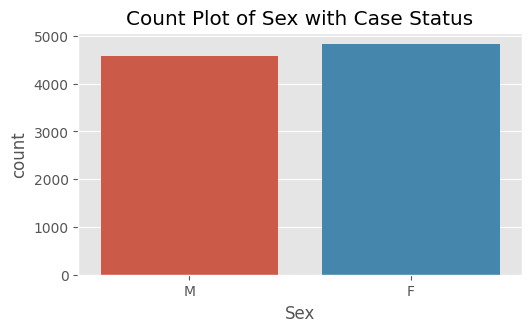

In [ ]:
# prompt: PLOT THE COUnt plot for sex with hue  at the top leftand grid

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Sex', hue='Sex', data=data)
plt.title('Count Plot of Sex with Case Status')

plt.tight_layout()
plt.show()

from the graph above more females were tested for cholera as compared males, we can deduce that females are more likely to be affected by cholera

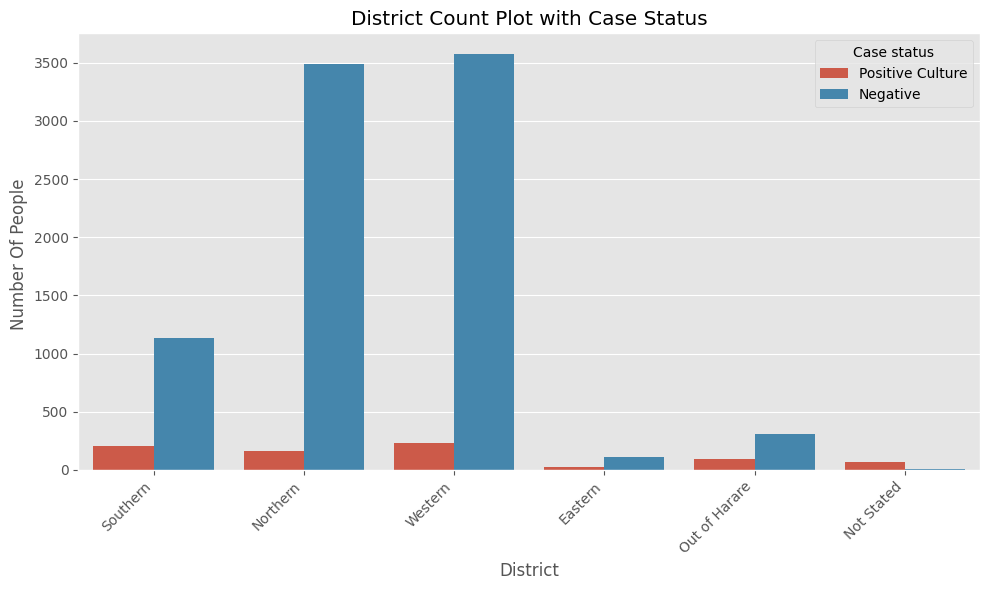

In [ ]:
#  plotting  the district  count plot of district with hue = Case status

plt.figure(figsize=(10, 6))
sns.countplot(x='District', hue='Case status', data=data)
plt.title('District Count Plot with Case Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel("Number Of People ")
plt.show()

People tested were from 4 Harare districts which are Southern, Northern, Western and Eastern. some people were not from Harare province and the few their districts were not mentioned.

the Southern District has the greater pecentage of people who tested positive followed by those from out Harare since we are comparing the number tested people in a given and those were tested positive and negative

People from the Sourthen are more prone to cholera as compared to other district since it has the hiest number of infected people.

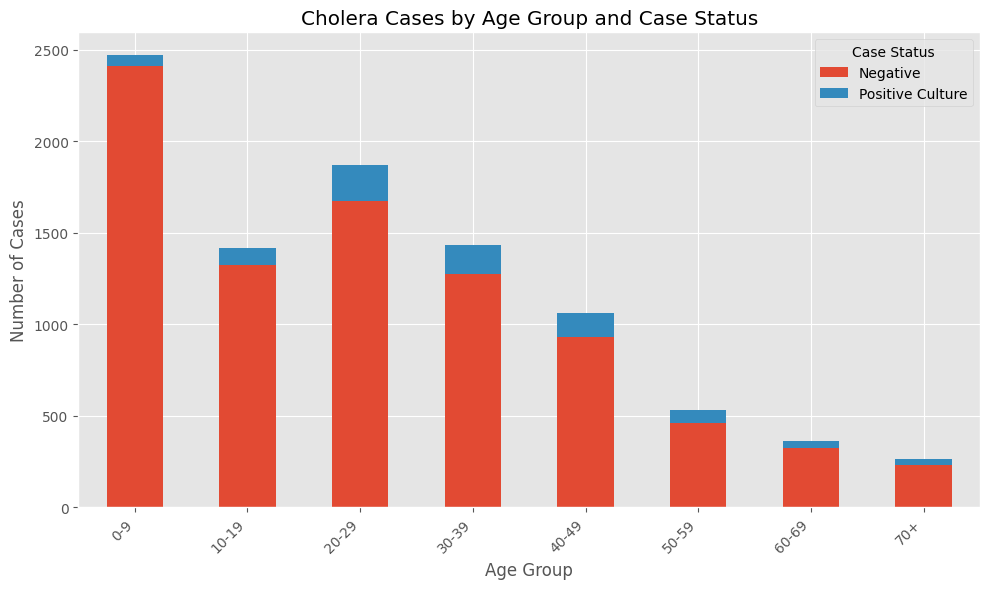

In [ ]:
# Creating  age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by age group and case status, then count
age_case_counts = data.groupby(['Age Group', 'Case status']).size().unstack(fill_value=0)

# Plotting
age_case_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cholera Cases by Age Group and Case Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

People between the Age of 20-49 are more vulnerable to cholera because are the most active group and they need to be taught more precaution measures in order to minimize the number of infections.

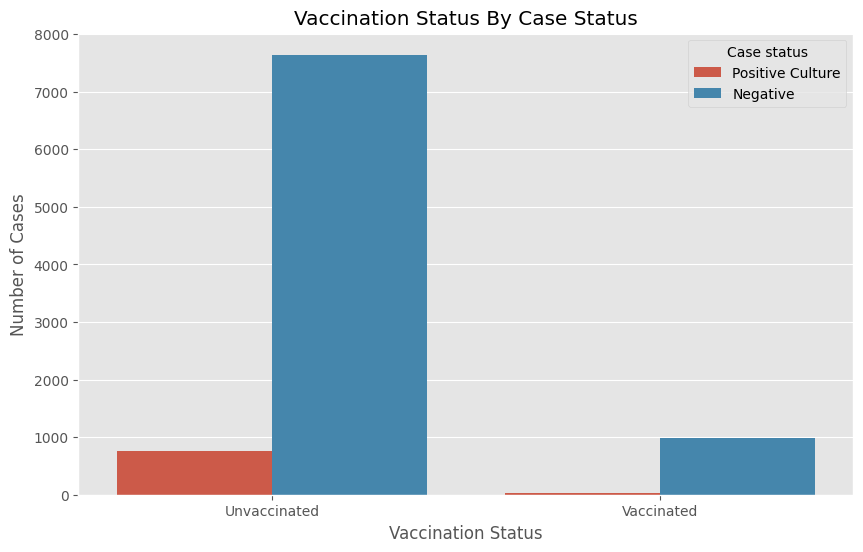

In [ ]:
#plotting Vaccination Status by  case status


plt.figure(figsize=(10, 6))
sns.countplot(x='Vacc Status OCV', hue='Case status', data=data)
plt.title('Vaccination Status By Case Status')
plt.xlabel('Vaccination Status')
plt.ylabel('Number of Cases')
plt.show()

the vaccine is effective in preventing cholera since most of the people who were tested positive were not vaccinated.
The graph shows that few people were vaccinated and there is need to encourage people to get vaccinated through awareness campaigns.

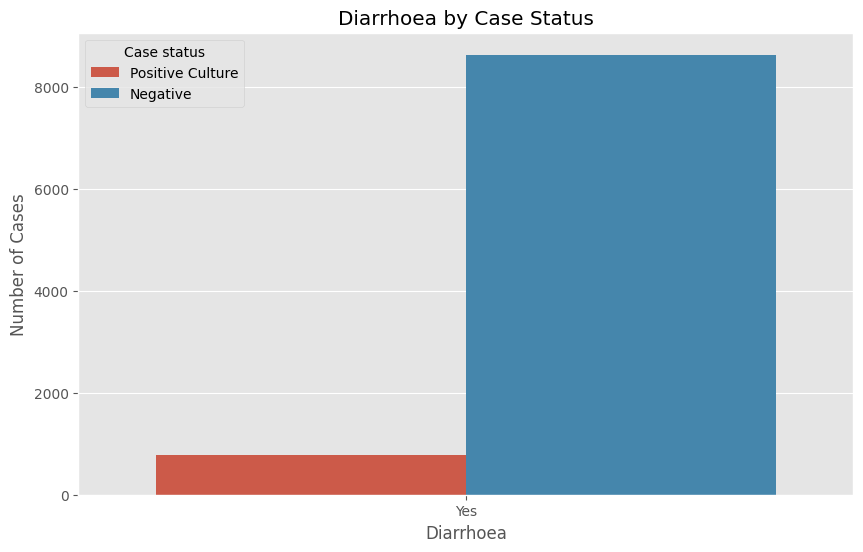

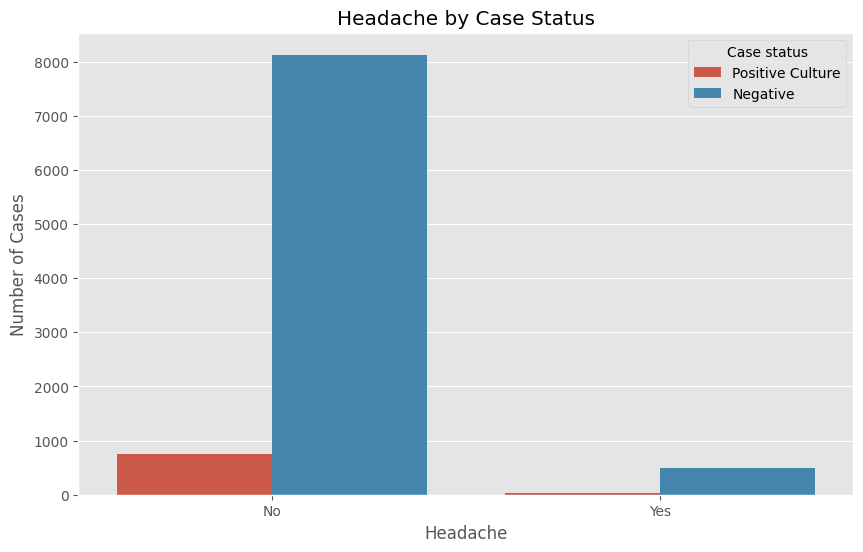

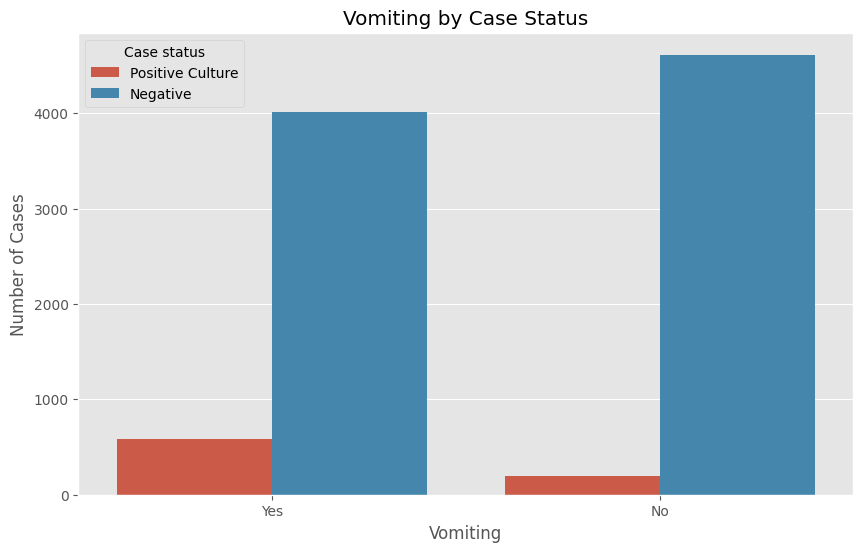

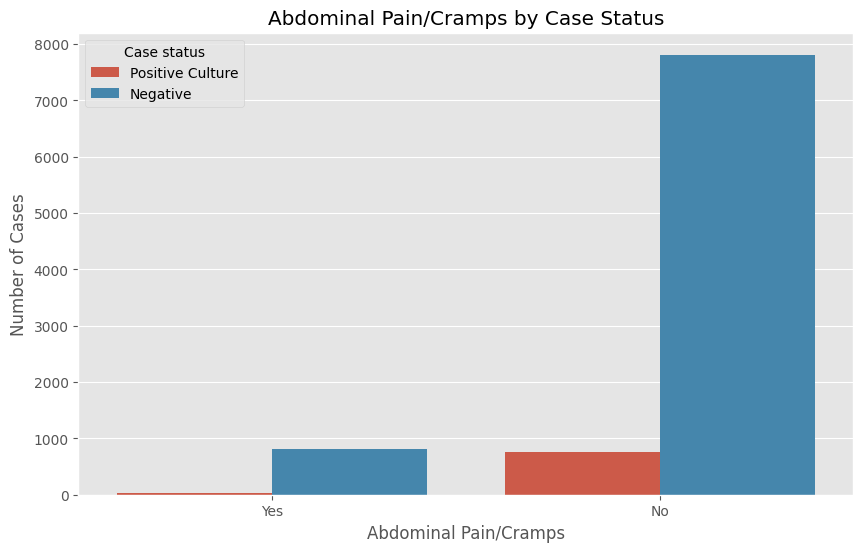

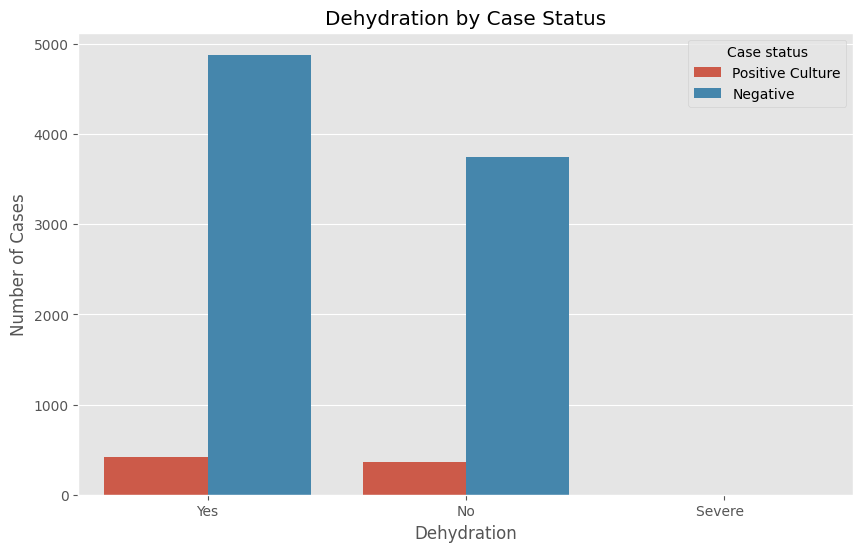

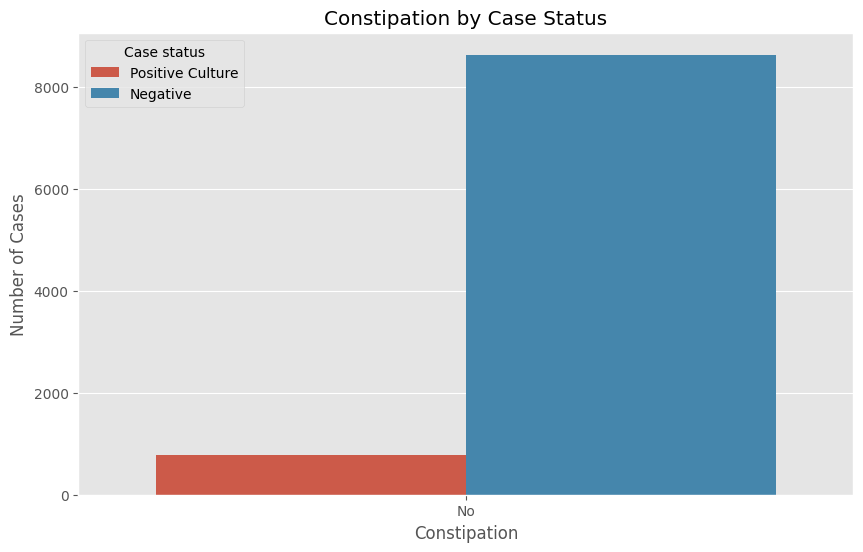

In [ ]:
# checking the effects of cholera symptoms on cholera infection status

plt.figure(figsize=(10, 6))
sns.countplot(x='Diarrhoea', hue='Case status', data=data)
plt.title('Diarrhoea by Case Status')
plt.xlabel('Diarrhoea')
plt.ylabel('Number of Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Headache', hue='Case status', data=data)
plt.title('Headache by Case Status')
plt.xlabel('Headache')
plt.ylabel('Number of Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Vomiting', hue='Case status', data=data)
plt.title('Vomiting by Case Status')
plt.xlabel('Vomiting')
plt.ylabel('Number of Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Abdominal Pain/Cramps', hue='Case status', data=data)
plt.title('Abdominal Pain/Cramps by Case Status')
plt.xlabel('Abdominal Pain/Cramps')
plt.ylabel('Number of Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Dehydration', hue='Case status', data=data)
plt.title('Dehydration by Case Status')
plt.xlabel('Dehydration')
plt.ylabel('Number of Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Constipation', hue='Case status', data=data)
plt.title('Constipation by Case Status')
plt.xlabel('Constipation')
plt.ylabel('Number of Cases')
plt.show()

the main sympton of cholera is diarrhoea, vomiting, dehydration, cramps and headache, constipation has no effect on the cholera infection status

## Results from the Exploratory data Analysis##



1.   the groups which are most vulnerable to cholera are people of the age 20-49, females and also hotspot districts in harare are Southern and Western so there is need to allocate more resource to these areas for cholera prevention and also encourage people in these areas to improve on hygiene.

2. Vaccine used in 2023/2024 cholera prevention was effective though few people were vaccinated so there is need to educate people on the importants of being vaccinated against cholera.

3. Hotspot areas areas they need close monitoring interms of waste management and access to clean water by residence so that the areas will not remain prone to cholera.



## Feature Engineering For Model Development##

This is the process of selecting, creating and transforming important features inorder to develop a robust and more accurate model

In [ ]:
# Selecting features for X
X = data[['Diarrhoea', 'Vomiting', 'Dehydration', 'Abdominal Pain/Cramps', 'Headache', 'Age']]

# Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Diarrhoea', 'Vomiting', 'Dehydration', 'Abdominal Pain/Cramps', 'Headache']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Select the target variable y
y = data['Case status']

# Convert target variable to numerical using Label Encoding
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [ ]:
# Printing the encoded values for 'x'
print("Encoded X features:")
print(X.head())

# Print encoded values for 'y'
print("\nEncoded y (Case Status):")
print(y[:5])

Encoded X features:
   Diarrhoea  Vomiting  Dehydration  Abdominal Pain/Cramps  Headache   Age
0          2         1            1                      1         0  45.0
1          2         0            0                      0         0  30.0
2          2         1            0                      0         0  23.0
3          2         0            0                      0         0  39.0
4          2         0            0                      0         0  30.0

Encoded y (Case Status):
[1 1 1 1 1]


** Feature Transformation**

Transforming the age into a form that can be understood better by the machine learning algorithms in order to improve on its performances

In [ ]:
# transforming  the age

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Age' column
X['Age'] = scaler.fit_transform(X[['Age']])

# Print the transformed 'Age' column
print(X['Age'].head())

0    0.982449
1    0.212414
2   -0.146935
3    0.674435
4    0.212414
Name: Age, dtype: float64


In [ ]:
# Calculating the ratio of positive and negative cases
case_status_counts = data['Case status'].value_counts(normalize=True) * 100

# Print the percentages
case_status_counts

,proportion
Case status,
Negative,91.687925
Positive Culture,8.312075


Our data is imbalance the ratio of negative is 92.04 so there is need to correct this because it may affect the peformance of our model

## Now Applying the Smote for over Sampling##

With our training data created, now we need  up-sample the positive case status using the SMOTE algorithm(Synthetic Minority Oversampling Technique).

SMOTE: Works by generating synthetic samples from the minor class (positive) instead of creating copies. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


In [ ]:

from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

1    8626
0    8626
Name: count, dtype: int64


now our data is now balanced

Then lets split the data into training and test



In [ ]:
#splitting the resampled data into train test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
#viewing the shape of the train and test data

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13801, 6)
Shape of X_test: (3451, 6)
Shape of y_train: (13801,)
Shape of y_test: (3451,)


##Model Building##
  A Random forest model has developed to classify the case status as positive  and negative since it is a supervised learning model and a classification is a supervice problem.
  


In [ ]:
# prompt: generate a random forest model

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy of Random Forest: 0.795131845841785
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1711
           1       0.78      0.82      0.80      1740

    accuracy                           0.80      3451
   macro avg       0.80      0.79      0.79      3451
weighted avg       0.80      0.80      0.79      3451

[[1309  402]
 [ 305 1435]]


the percentage accuracy of the model is 79.57% which is not perfect so there is need for parameter tuning in order to improve on model peformance.


## Fine Tuning the model##

the model was fine tuned using the k-fold which work by splitting the data into subsets and use those subsets for training the mode and the evaluate the trained model using accuracy or loss.

In [ ]:
# prompt: fine tune the model using the k fold

from sklearn.model_selection import KFold, cross_val_score

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Cross-validation scores: [0.7986091  0.7896262  0.80202899 0.7915942  0.79855072]
Mean accuracy: 0.796081841432225
Standard deviation of accuracy: 0.004683272430988533


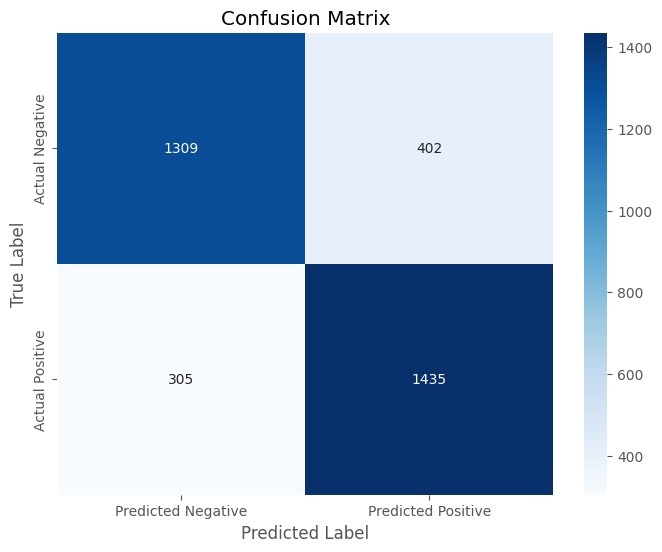

In [ ]:
#  computing a confusion matrix and plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# save the model

import joblib

joblib.dump(rf_classifier, '/content/drive/MyDrive/cholera_model.pkl')

['/content/drive/MyDrive/cholera_model.pkl']

##DEPLOYED Model LINK##
click here to access the *model*

##Conclusion And Remarks##

the RandomForest model develop was trained using harare cholera linelist, fine tuned using K fold technigue and then evaluated using a confusion matrix and accuracy score which is *84%* and delopyed using streamlit. the independent variables used are Diarrhoea, Vomiting, Dehydration, Abdominal Pain/Cramps, Headache and Age.

##References##

  1. Health Information Office(608), qnanyanga@gmail.com
  2. Jason Brownlee, 2021.SMOTE for Imbalanced Classification with Python. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
